In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('AIML Dataset.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
dataset.info()

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
dataset.shape

(6362620, 11)

In [7]:
dataset.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [10]:
dataset['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [11]:
sns.set(style='darkgrid')

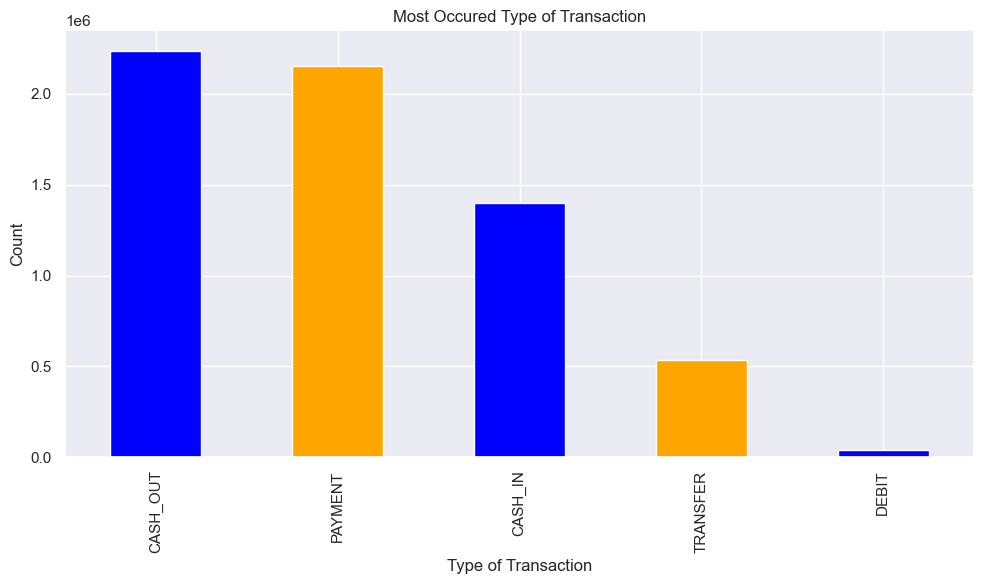

In [12]:
dataset['type'].value_counts().plot(kind='bar', figsize=(10, 6), color = ['blue','orange'])
plt.title('Most Occured Type of Transaction')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
dataset['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

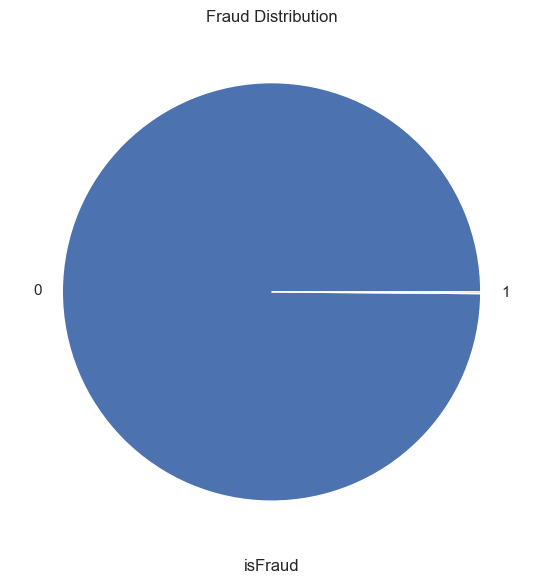

In [14]:
dataset['isFraud'].value_counts().plot(kind = 'pie', figsize=(10,6), color=['blue', 'orange'])
plt.title('Fraud Distribution')
plt.xlabel('isFraud')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
dataset.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

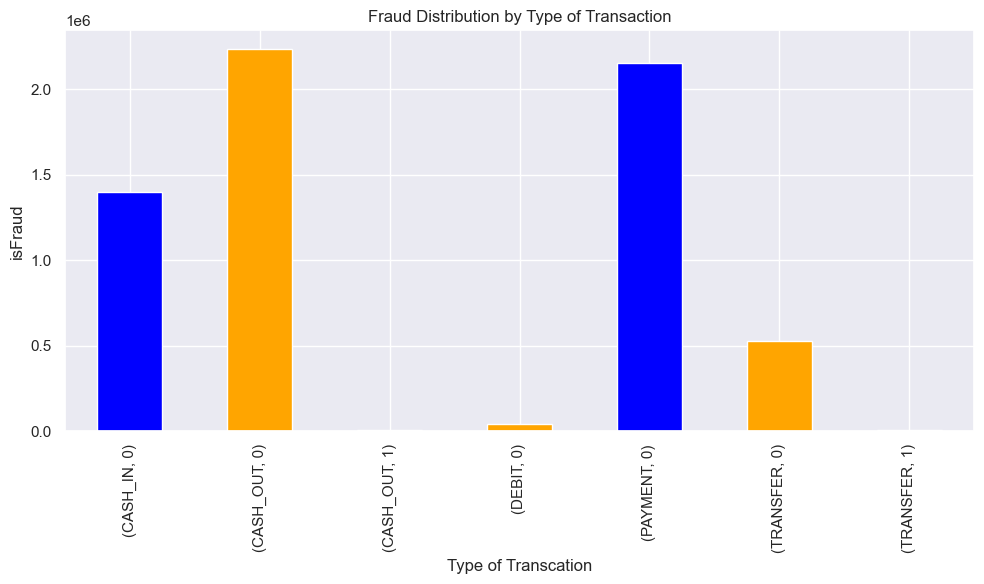

In [16]:
dataset.groupby('type')['isFraud'].value_counts().plot(kind='bar', figsize=(10,6), color = ['blue', 'orange'])
plt.title('Fraud Distribution by Type of Transaction')
plt.xlabel('Type of Transcation')
plt.ylabel('isFraud')
plt.tight_layout()
plt.show()

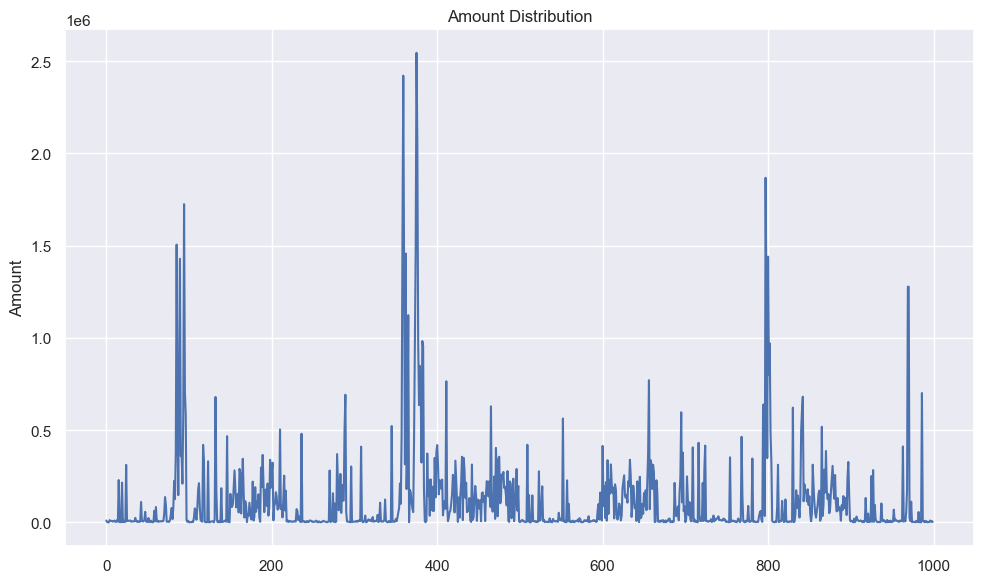

In [31]:
dataset['amount'].head(1000).plot(kind='line', figsize=(10,6))
plt.title('Amount Distribution')
plt.xlabel('')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [18]:
dataset.groupby('type')['isFlaggedFraud'].value_counts()

type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
Name: count, dtype: int64

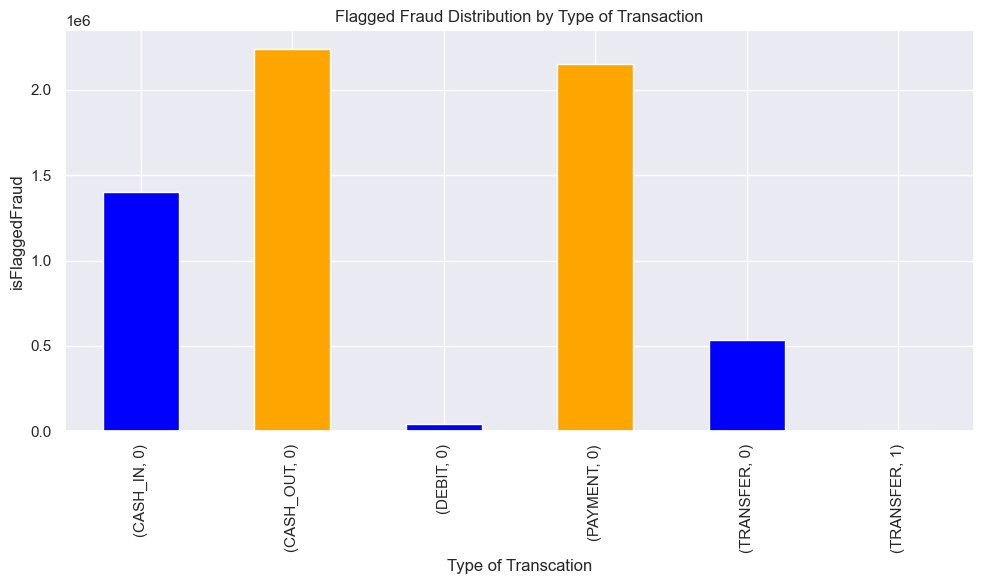

In [19]:
dataset.groupby('type')['isFlaggedFraud'].value_counts().plot(kind='bar', figsize=(10,6), color = ['blue', 'orange'])
plt.title('Flagged Fraud Distribution by Type of Transaction')
plt.xlabel('Type of Transcation')
plt.ylabel('isFlaggedFraud')
plt.tight_layout()
plt.show()

In [20]:
dataset['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

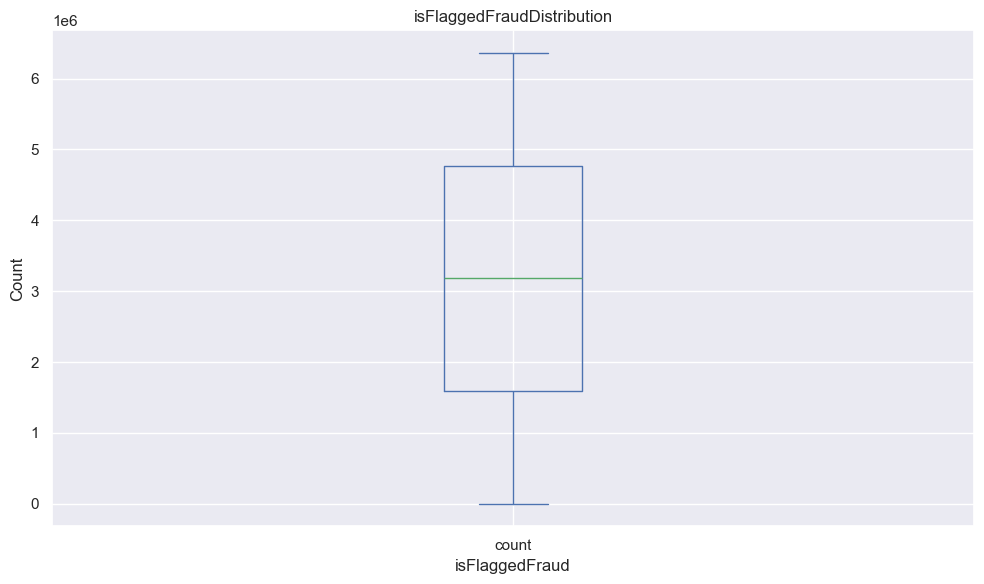

In [21]:
dataset['isFlaggedFraud'].value_counts().plot(kind='box', figsize=(10,6))
plt.title('isFlaggedFraudDistribution')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

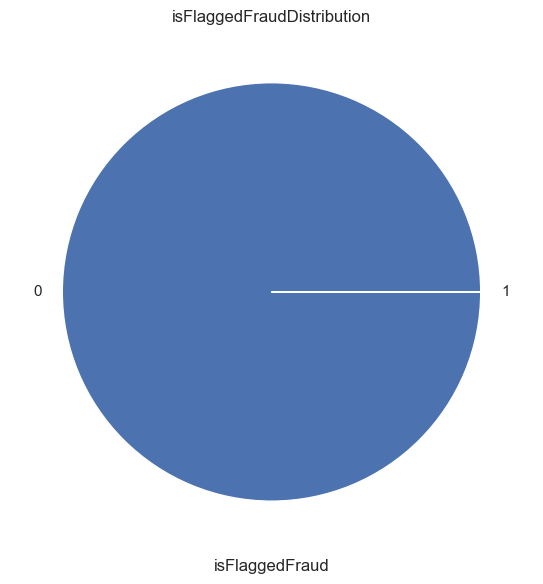

In [22]:
dataset['isFlaggedFraud'].value_counts().plot(kind='pie', figsize=(10,6), color=['orange', 'blue'])
plt.title('isFlaggedFraudDistribution')
plt.xlabel('isFlaggedFraud')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
dataset.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [24]:
dataset = dataset.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
dataset.head(2)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset['type'] = encoder.fit_transform(dataset['type'])

dataset.head(2)

dataset['type'].unique()

array([3, 4, 1, 2, 0])

In [ ]:
x = dataset.drop(['isFraud'], axis=1)
y = dataset['isFraud']
x
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [ ]:
corr = dataset.corr()
corr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833
amount,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'type'),
  Text(1.5, 0, 'amount'),
  Text(2.5, 0, 'oldbalanceOrg'),
  Text(3.5, 0, 'newbalanceOrig'),
  Text(4.5, 0, 'oldbalanceDest'),
  Text(5.5, 0, 'newbalanceDest'),
  Text(6.5, 0, 'isFraud')])

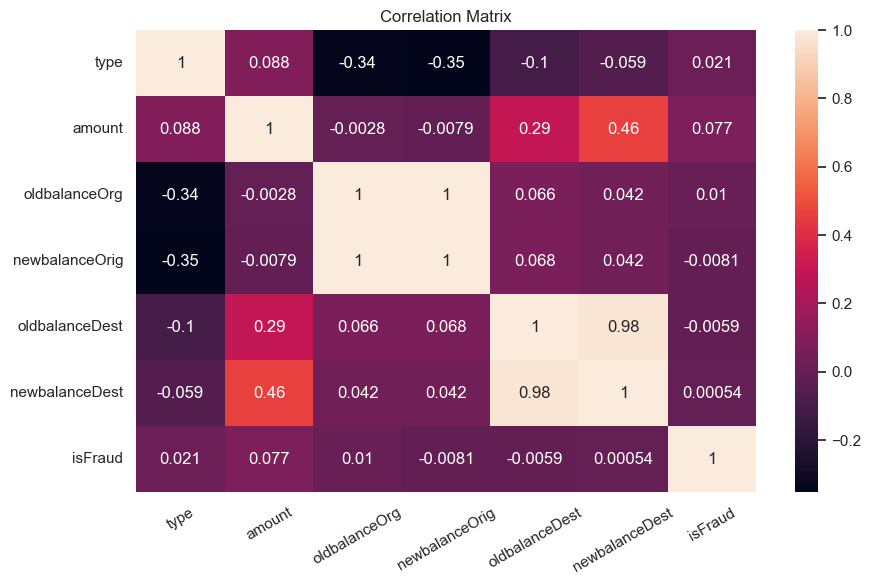

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot = True)
plt.title('Correlation Matrix')
plt.xticks(rotation=30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_y_pred))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 99.97%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Random Forest Confusion Matrix:
[[1270860      44]
 [    335    1285]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print('Decision Tree Classification Report:')
print(classification_report(y_test, dt_y_pred))
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 99.98%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.90      0.90      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

Decision Tree Confusion Matrix:
[[1270754     150]
 [    165    1455]]


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print('SVM Classification Report:')
print(classification_report(y_test, svm_y_pred))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, svm_y_pred))

SVM Accuracy: 99.91%
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.33      0.49      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524

SVM Confusion Matrix:
[[1270893      11]
 [   1085     535]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print('KNN Classification Report:')
print(classification_report(y_test, knn_y_pred))
print('KNN Confusion Matrix:')
print(confusion_matrix(y_test, knn_y_pred))

KNN Accuracy: 99.96%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.74      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

KNN Confusion Matrix:
[[1270806      98]
 [    419    1201]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_y_pred = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%')
print('Naive Bayes Classification Report:')
print(classification_report(y_test, nb_y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, nb_y_pred))

Naive Bayes Accuracy: 99.25%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.03      0.16      0.05      1620

    accuracy                           0.99   1272524
   macro avg       0.51      0.57      0.52   1272524
weighted avg       1.00      0.99      1.00   1272524

Naive Bayes Confusion Matrix:
[[1262760    8144]
 [   1367     253]]


TO check whether our model is overfitted or not

In [ ]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, dt_model.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, dt_y_pred))


Train Accuracy: 1.0
Test Accuracy: 0.9997524604643999


In [ ]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, rf_model.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, rf_y_pred))


Train Accuracy: 0.9999994106201533
Test Accuracy: 0.9997021667174844


In [ ]:
y_pred = rf_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.00,160296.36,0.00,0.00
1,3,1864.28,21249.00,19384.72,0.00,0.00
2,4,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,4,850002.52,850002.52,0.00,0.00,0.00


In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [ ]:
user_input = [[2, 11668, 41554, 29885, 0, 0]]
results = rf_model.predict(user_input)[0]
print('Prediction: ', results)

Prediction:  0
